### Fill out:
Name & Surname: Daniel Ong

Student ID: 34897887

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [1]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  code  
0       3750.0    Male     0  
1       3800.0  Female     0  
2       3250.0  Female     0  
3          NaN     NaN     0  
4       3450.0  Female     0  


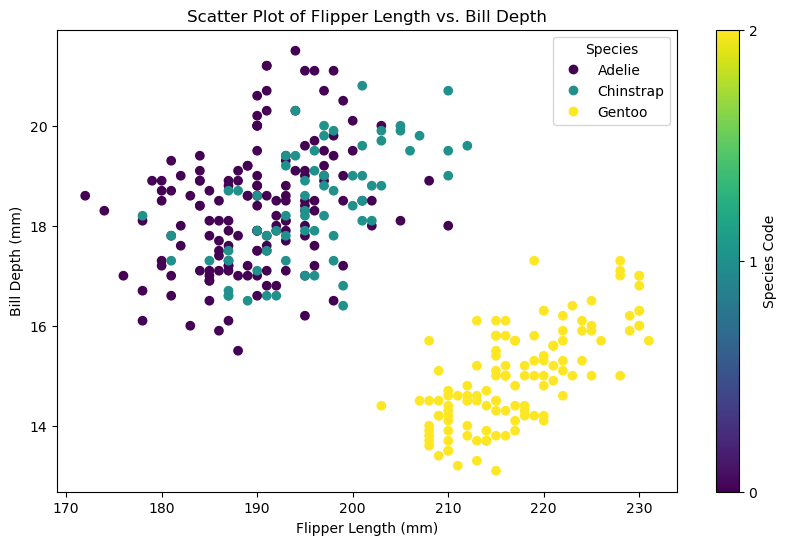

(   flipper_length_mm  bill_depth_mm
 0              181.0           18.7
 1              186.0           17.4
 2              195.0           18.0
 4              193.0           19.3
 5              190.0           20.6,
 0    0
 1    0
 2    0
 4    0
 5    0
 Name: code, dtype: int8,
 array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd
from warnings import simplefilter

#Ignore future warnings
simplefilter(action = 'ignore' , category = FutureWarning)

#import penguins dataset
penguin_data = sns.load_dataset('penguins')
penguins = pd.DataFrame(penguin_data)

# Create a numerical code for species
penguins['code'] = penguins['species'].astype('category').cat.codes


# Drop rows with missing values in the specified columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

print(penguins.head())

# Drop rows with missing values in specific columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

# Create feature array
features = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm']]

# Create target series
target = penguins_cleaned['code']

# Get unique species names
unique_species = penguins_cleaned['species'].unique()

# Show first 5 rows of feature array
features_head = features.head()

# Show first 5 values of target series
target_head = target.head()

# Show unique species names
unique_species

# Plot scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(penguins_cleaned['flipper_length_mm'], penguins_cleaned['bill_depth_mm'], c=penguins_cleaned['code'], cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species Code')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Scatter Plot of Flipper Length vs. Bill Depth')

# Create a custom legend
handles, _ = scatter.legend_elements()
labels = unique_species
plt.legend(handles, labels, title='Species')

plt.show()

(features_head, target_head, unique_species)


### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

First few rows of the penguins dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Summary statistics of the dataset:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.0000

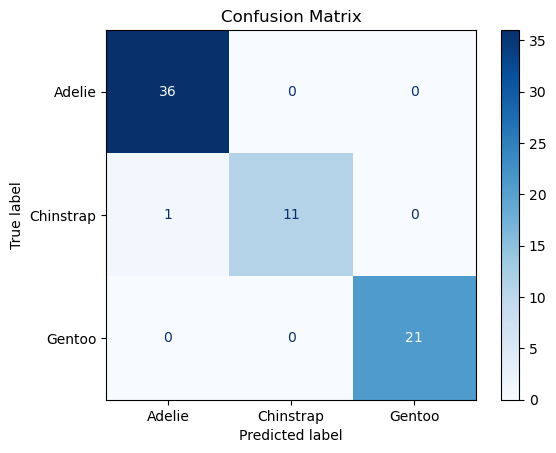

In [5]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter

# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the penguins dataset:")
print(penguins.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(penguins.describe())

# Create a numerical code for classification of species
species_codes = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
penguins['code'] = penguins['species'].map(species_codes)

# Drop rows with missing values in specific columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'species', 'code'])

# Create feature array and target series
X = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm', 'body_mass_g']]
y = penguins_cleaned['code']

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Create kNN model with tuned parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train (fit) the model on the training data
knn.fit(X_train, y_train)

# Calculate predictions for feature values in the testing set
y_pred = knn.predict(X_test)

# Show the first 5 entries of predictions
predictions_head = y_pred[:5]
print("\nFirst 5 predictions:", predictions_head)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

   flipper_length_mm  bill_depth_mm
0          12.871831       9.469346
1          13.227406       8.811049
2          13.867442       9.114879
4          13.725212       9.773175
5          13.511867      10.431472


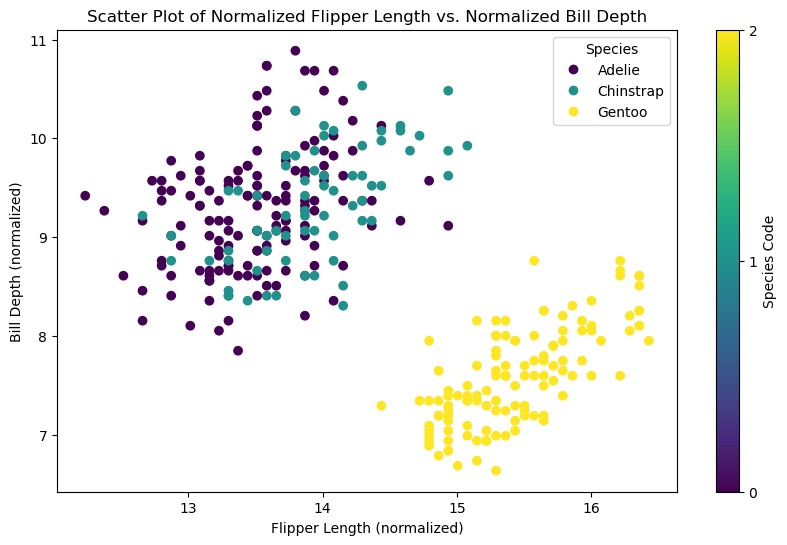

First 5 predictions: [0 2 1 2 0]
Accuracy: 0.75


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from warnings import simplefilter

# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load penguins dataset
penguins = sns.load_dataset('penguins')

# Create a numerical code for classification of species
species_codes = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
penguins['code'] = penguins['species'].map(species_codes)

# Drop rows with missing values in specific columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

# Create feature array and target series
X = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm']]
y = penguins_cleaned['code']

# Normalize the feature array by dividing by its standard deviation
X_normalized = X / X.std()

# Show first 5 rows of the normalized feature array
print(X_normalized.head())

# Plot scatter plot of normalized features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_normalized['flipper_length_mm'], X_normalized['bill_depth_mm'], c=penguins_cleaned['code'], cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species Code')
plt.xlabel('Flipper Length (normalized)')
plt.ylabel('Bill Depth (normalized)')
plt.title('Scatter Plot of Normalized Flipper Length vs. Normalized Bill Depth')

# Create a custom legend
handles, _ = scatter.legend_elements()
labels = ['Adelie', 'Chinstrap', 'Gentoo']
plt.legend(handles, labels, title='Species')

plt.show()

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

# Create kNN model
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Train (fit) the model on training data
knn.fit(X_train, y_train)

# Calculate predictions for feature values in the testing set
y_pred = knn.predict(X_test)

# Show first 5 entries of predictions
predictions_head = y_pred[:5]
print("First 5 predictions:", predictions_head)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

First few rows of the penguins dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Summary statistics of the dataset:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.0000

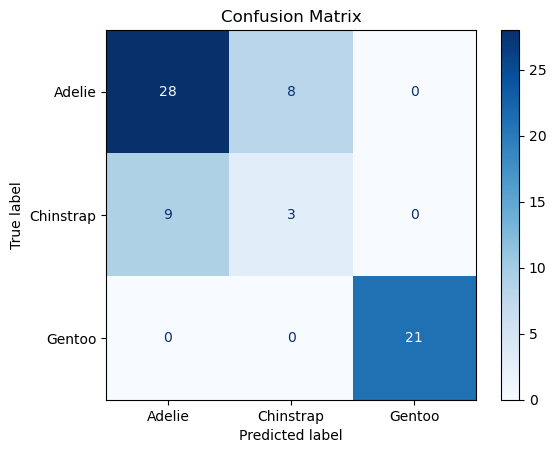

The accuracy decreased


In [7]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from warnings import simplefilter

# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the penguins dataset:")
print(penguins.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(penguins.describe())

# Create a numerical code for classification of species
species_codes = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
penguins['code'] = penguins['species'].map(species_codes)

# Drop rows with missing values in specific columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])

# Create feature array and target series
X = penguins_cleaned[['flipper_length_mm', 'bill_depth_mm']]
y = penguins_cleaned['code']

# Normalize the feature array by dividing by its standard deviation
X_normalized = X / X.std()

# Show the first 5 rows of the normalized feature array
print("\nFirst 5 rows of the normalized feature array:")
print(X_normalized.head())

# Split the normalized data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

# Create kNN model with 10 nearest neighbors and uniform weights
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Train (fit) the model on the training data
knn.fit(X_train, y_train)

# Calculate predictions for feature values in the testing set
y_pred = knn.predict(X_test)

# Show the first 5 entries of predictions
print("\nFirst 5 predictions:", y_pred[:5])

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("The accuracy decreased")